# Agregacija združevanje in tranformacija podatkov

## Data Aggregation

### Introduction to the Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# happiness2015["Hapiness Score"].plot(kind='bar', title="Happiness Score", ylim=(0,10))

happiness2015["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

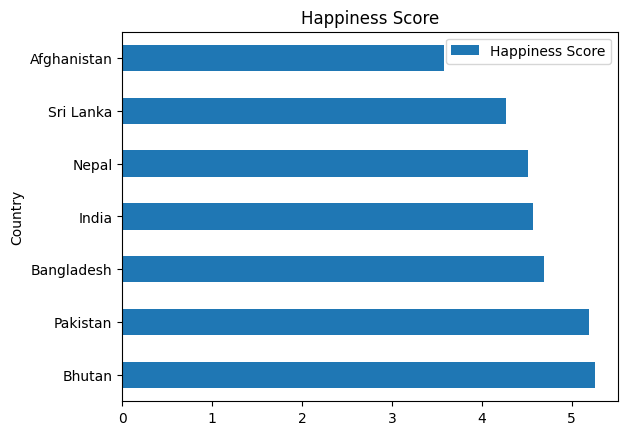

In [5]:
so_asia = happiness2015[happiness2015["Region"]=="Southern Asia"]
so_asia.plot(kind='barh', title="Happiness Score", x="Country", y="Happiness Score", ylim=(0,10))
plt.show()

### Aggregate Data with Loops

In [7]:
# Rocni nacini ki jih ne uporabljamo
mean_happiness = {}

for region in happiness2015['Region'].unique():
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == region]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[region] = region_mean

mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.1446818181818195,
 'Southeastern Asia': 5.317444444444444,
 'Central and Eastern Europe': 5.332931034482757,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.2028,
 'Southern Asia': 4.580857142857143}

### GroupBy Operation

In [21]:
# pokazi informacije o grupi
happiness2015.groupby("Region").get_group("North America")

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


#### Exploring GroupBy Objects

In [22]:
# izpisi podatke posameznih grup -> vidi se kako pandas grupira (po katerih indeksih)
happiness2015.groupby("Region").groups

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

In [23]:
# koliko elementov je v posameznih grupah
happiness2015.groupby("Region").size() # uposteva tudi NaN

# happiness2015.groupby("Region").count() # ne presteje NaN

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

#### Common Aggregation Methods

In [27]:
# metoda mean po vseh stolpcih
happiness2015.groupby("Region").mean(numeric_only=True)

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,2,2,2,2,2,2,2,2,2,2,2
Central and Eastern Europe,29,29,29,29,29,29,29,29,29,29,29
Eastern Asia,6,6,6,6,6,6,6,6,6,6,6
Latin America and Caribbean,22,22,22,22,22,22,22,22,22,22,22
Middle East and Northern Africa,20,20,20,20,20,20,20,20,20,20,20
North America,2,2,2,2,2,2,2,2,2,2,2
Southeastern Asia,9,9,9,9,9,9,9,9,9,9,9
Southern Asia,7,7,7,7,7,7,7,7,7,7,7
Sub-Saharan Africa,40,40,40,40,40,40,40,40,40,40,40


#### Aggregating Specific Columns

In [26]:
happiness2015.groupby("Region")["Happiness Score"].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

<img src="./images/split_apply_combine.svg">

#### Creating GroupBy Objects

<img src="./images/Groups.svg">

#### Agg() Method

In [28]:
import numpy as np

In [29]:
happiness2015.groupby("Region")["Happiness Score"].agg([np.mean, np.max])

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


#### Computing Multiple and Custom Aggregations

In [30]:
def diff(group):
    return (group.max() - group.mean())
happiness2015.groupby("Region")["Happiness Score"].agg([np.mean, np.max, diff])

,mean,amax,diff
Region,,,
Australia and New Zealand,7.285000,7.286,0.001000
Central and Eastern Europe,5.332931,6.505,1.172069
Eastern Asia,5.626167,6.298,0.671833
Latin America and Caribbean,6.144682,7.226,1.081318
Middle East and Northern Africa,5.406900,7.278,1.871100
North America,7.273000,7.427,0.154000
Southeastern Asia,5.317444,6.798,1.480556
Southern Asia,4.580857,5.253,0.672143
Sub-Saharan Africa,4.202800,5.477,1.274200


### Pivot Tables
Enako kot group by. Sintaksa je lažje berljiva v primerih da so kompleksnejši podatki

<img src="./images/PV_Syntax.svg">

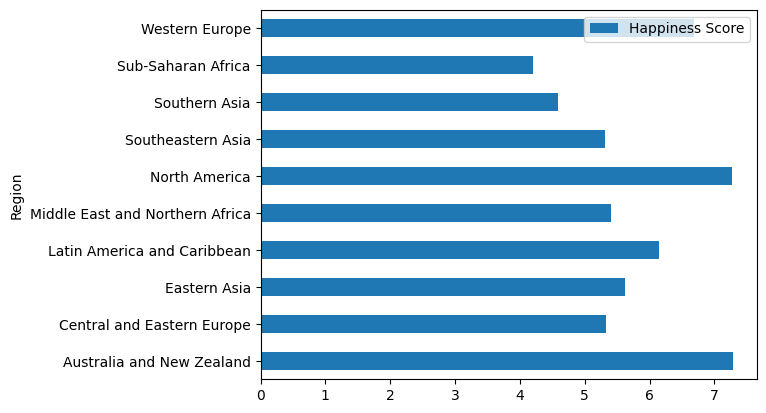

In [35]:
a = happiness2015.pivot_table(index="Region", values="Happiness Score", aggfunc=np.mean)
a.plot(kind="barh")
plt.show()

## Pandas DataFrame all() Method

In [37]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [41]:
happiness2015["Region"].all() # če samo en element false, prazen, NaN je rezultat operacije False

True

## Combining Data

In [70]:
import pandas as pd

happiness2015 = pd.read_csv("data/World_Happiness_2015.csv")
happiness2016 = pd.read_csv("data/World_Happiness_2016.csv")
happiness2017 = pd.read_csv("data/World_Happiness_2017.csv")

In [71]:
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [80]:
happiness2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


### Combining Dataframes with the Concat Function

<img src="./images/Concat_Updated.svg">

<img src="./images/Concat_Axis1.svg">

<img src="./images/Concat_syntax.svg">

In [89]:
subjects = ['Year','Country','Happiness Score', 'Standard Error']

In [90]:
head_2015 = happiness2015[subjects].head()
head_2015

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2015,Canada,7.427,0.03553


In [91]:
head_2016 = happiness2016[['Year','Country','Happiness Score']].head()
head_2016

,Year,Country,Happiness Score
0,2016,Denmark,7.526
1,2016,Switzerland,7.509
2,2016,Iceland,7.501
3,2016,Norway,7.498
4,2016,Finland,7.413


In [ ]:
# od tu dalje si kopiraj od Leona -  nisem sledil - nekaj ni ok s Standard Error stolpcom

<img src="./images/Concat_DifShapes.svg">

### Joining Dataframes with the Merge Function

<img src="./images/Merge_link.svg">

<img src="./images/Merge.svg">

<img src="./images/Merge_syntax.svg">

In [93]:
three_2015 = happiness2015[["Country", "Happiness Rank", 'Year']].iloc[2:5]
three_2016 = happiness2016[["Country", "Happiness Rank", 'Year']].iloc[2:5]
three_2017 = happiness2017[["Country", "Happiness.Rank", 'Year']].iloc[2:5]


In [94]:
three_2015

,Country,Happiness Rank,Year
2,Denmark,3,2015
3,Norway,4,2015
4,Canada,5,2015


In [95]:
three_2016

,Country,Happiness Rank,Year
2,Iceland,3,2016
3,Norway,4,2016
4,Finland,5,2016


In [96]:
three_2017

,Country,Happiness.Rank,Year
2,Iceland,3,2017
3,Switzerland,4,2017
4,Finland,5,2017


In [97]:
pd.merge(left=three_2015, right=three_2016, on="Country") # privzeto je inner join

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


In [98]:
pd.merge(left=three_2015, right=three_2016, on="Country", how="left")

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Denmark,3,2015,NaN,NaN
1,Norway,4,2015,4.0,2016.0
2,Canada,5,2015,NaN,NaN


In [100]:
pd.merge(left=three_2015, right=three_2016, on="Country", how="right")

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Iceland,NaN,NaN,3,2016
1,Norway,4.0,2015.0,4,2016
2,Finland,NaN,NaN,5,2016


Zamenjamo privzete koncnice v imenih stolpcev

In [102]:
pd.merge(left=three_2015, right=three_2016, on="Country", how="outer", suffixes=["_2015", "_2016"])

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016
0,Denmark,3.0,2015.0,NaN,NaN
1,Norway,4.0,2015.0,4.0,2016.0
2,Canada,5.0,2015.0,NaN,NaN
3,Iceland,NaN,NaN,3.0,2016.0
4,Finland,NaN,NaN,5.0,2016.0


In [111]:
first_two = pd.merge(left=three_2015, right=three_2016, on="Country", how="outer", suffixes=["_2015", "_2016"])
all_df = pd.merge(left=first_two, right=three_2017, how="outer", on="Country", suffixes=["", "_2017"])
all_df.rename(columns={"Happiness.Rank":"Happiness Rank_2017"}, inplace=True)
all_df.drop(columns=["Year_2015", "Year_2016"])
all_df

,Country,Happiness Rank_2015,Year_2015,Happiness Rank_2016,Year_2016,Happiness Rank_2017,Year
0,Denmark,3.0,2015.0,NaN,NaN,NaN,NaN
1,Norway,4.0,2015.0,4.0,2016.0,NaN,NaN
2,Canada,5.0,2015.0,NaN,NaN,NaN,NaN
3,Iceland,NaN,NaN,3.0,2016.0,3.0,2017.0
4,Finland,NaN,NaN,5.0,2016.0,5.0,2017.0
5,Switzerland,NaN,NaN,NaN,NaN,4.0,2017.0


#### Joining on Columns

#### Left Joins

In [ ]:
(columns={"Happiness.Rank":"Happiness Rank_2017"}, inplace=True)

#### Join on Index

<img src="./images/Index.svg">

### Primer: Combine Data and Create a Visualization


<table class="tg">
<tbody><tr>
<th></th>
<th><span style="font-weight:bold">pd.concat()</span></th>
<th><span style="font-weight:bold">pd.merge()</span></th>
</tr>
<tr>
<td><span style="font-style:normal">Default Join Type</span></td>
<td><span style="font-weight:300;font-style:normal">Outer</span></td>
<td><span style="font-weight:300;font-style:normal">Inner</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine More Than Two Dataframes at a Time?</span></td>
<td><span style="font-weight:300;font-style:normal">Yes</span></td>
<td><span style="font-weight:300;font-style:normal">No</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine Dataframes Vertically</span><br><span style="font-style:normal">(axis=0) or Horizontally (axis=1)?</span><br></td>
<td><span style="font-weight:300;font-style:normal">Both</span></td>
<td><span style="font-weight:300;font-style:normal">Horizontally</span></td>
</tr>
<tr>
<td>Syntax</td>
<td><span style="font-weight:bold">Concat (Vertically)</span><br>concat([df1,df2,df3])<br><br><span style="font-weight:bold">Concat (Horizontally)</span><br>concat([df1,df2,df3], axis = 1)<br><br><br><br></td>
<td><span style="font-weight:bold">Merge (Join on Columns)</span><br>merge(left = df1, right = df2, how = 'join_type', on = 'Col')<br><br><span style="font-weight:bold">Merge (Join on Index)</span><br>merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)<br><br><br><br></td>
</tr>
</tbody></table>


In [ ]:
# naloga: 
# zdruzite za vsa tri leta happiness
# naredite pivot table - agg po letih, mean vseh drzav za posamezno leto
# plot

In [142]:
happiness2015 = pd.read_csv("data/World_Happiness_2015.csv")[["Country", "Happiness Score"]]

happiness2016 = pd.read_csv("data/World_Happiness_2016.csv")[["Country", "Happiness Score"]]

happiness2017 = pd.read_csv("data/World_Happiness_2017.csv")[["Country", "Happiness.Score"]]
happiness2017.rename(columns={"Happiness.Score":"Happiness Score"}, inplace=True)

In [129]:
happiness2015.head()
happiness2016.head()
happiness2017.head()

,Country,Happiness.Score,Year
0,Norway,7.537,2017
1,Denmark,7.522,2017
2,Iceland,7.504,2017
3,Switzerland,7.494,2017
4,Finland,7.469,2017


In [145]:
a = pd.merge(left=happiness2015, right=happiness2016, on="Country", suffixes=["_2015","_2016"])

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score
0,Switzerland,7.587,7.509,7.494
1,Iceland,7.561,7.501,7.504
2,Denmark,7.527,7.526,7.522
3,Norway,7.522,7.498,7.537
4,Canada,7.427,7.404,7.316
...,...,...,...,...
141,Rwanda,3.465,3.515,3.471
142,Benin,3.340,3.484,3.657
143,Syria,3.006,3.069,3.462
144,Burundi,2.905,2.905,2.905


## Transforming Data

In [28]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [29]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [30]:
mapping = {'Economy (GDP per Capita)': 'Economy', 
           'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }

In [31]:
happiness2015.rename(mapping, axis=1, inplace=True)

In [32]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Map and Apply Methods (Element-wise)

In [9]:
# funkcijo label želimo zagnati po celem stolpcu

def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

In [10]:
# Uporaba MAP funkcije
# spreminjanje vrednosti preko map funkcije
happiness2015["Economy"].map(label)

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

In [11]:
# Uporaba APPLY funkcije
happiness2015["Economy"].apply(label)

0      High
1      High
2      High
3      High
4      High
       ... 
153     Low
154     Low
155     Low
156     Low
157     Low
Name: Economy, Length: 158, dtype: object

<img src="./images/Map_generic.svg">

In [33]:
# dodatni parameter v funkciji

def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'

In [34]:
# v tem primeru map ne more sprejeti dodatnega parametra. Zato uporabimo metodo .apply
happiness2015["Economy impact"] = happiness2015["Economy"].apply(label, x=0.8)


In [35]:
happiness2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,High
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,High
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Low
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Low
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Low
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Low


<img src="./images/Map.svg">

### Applymap Method (Element-wise to Multiple Columns)

Izvedemo map funkcijo nad večimi stolpci hkrati

In [37]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

factors_df = happiness2015[factors].applymap(label)
factors_df.head()


,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


### Apply Method (along an Axis)

In [38]:
# znotraj apply lahko uporabimo tudi standardne pandas funkcije
factors_df.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


In [39]:
# primer racunanja neke statistike 

def v_counts(col):
    num = col.value_counts()
    den = col.size
    return (num/den) * 100

factors_df.apply(v_counts)


,Economy,Family,Health,Freedom,Trust,Generosity
High,41.772152,56.329114,1.265823,NaN,NaN,NaN
Low,58.227848,43.670886,98.734177,100.0,100.0,100.0


<img src="./images/Apply_counts.svg">

<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
</tbody></table>

### Melt Function

Preoblikuje df, tako da je vsak podatek (value_vars) za izbor (id_vars) v svoji vrstici.

Lahko si predstavljamo tako, da column pretvori v kategorijo (kategorično spremenljivko) -> Naredi več posameznih novih vrstic

argumenti:
id_vars
value_vars

<img src="./images/Melt_Syntax.svg">

In [41]:
first_two = happiness2015.head(2)
first_two

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Economy impact
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,High
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,High


In [62]:
pd.melt(first_two, id_vars=["Country", "Region","Happiness Rank"], value_vars=["Economy", "Family", "Health", "Trust"]).sort_values(by="Country")

,Country,Region,Happiness Rank,variable,value
1,Iceland,Western Europe,2,Economy,1.30232
3,Iceland,Western Europe,2,Family,1.40223
5,Iceland,Western Europe,2,Health,0.94784
7,Iceland,Western Europe,2,Trust,0.14145
0,Switzerland,Western Europe,1,Economy,1.39651
2,Switzerland,Western Europe,1,Family,1.34951
4,Switzerland,Western Europe,1,Health,0.94143
6,Switzerland,Western Europe,1,Trust,0.41978


In [48]:
# 2. primer
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

In [49]:
melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)

In [58]:
melt.head(10)

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86
5,Finland,Western Europe,6,7.406,Economy,1.29025,17.42
6,Netherlands,Western Europe,7,7.378,Economy,1.32944,18.02
7,Sweden,Western Europe,8,7.364,Economy,1.33171,18.08
8,New Zealand,Australia and New Zealand,9,7.286,Economy,1.25018,17.16
9,Australia,Australia and New Zealand,10,7.284,Economy,1.33358,18.31


In [57]:
melt.tail(10)

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
1096,Chad,Sub-Saharan Africa,149,3.667,Dystopia Residual,1.94296,52.99
1097,Guinea,Sub-Saharan Africa,150,3.656,Dystopia Residual,1.99172,54.48
1098,Ivory Coast,Sub-Saharan Africa,151,3.655,Dystopia Residual,1.41723,38.78
1099,Burkina Faso,Sub-Saharan Africa,152,3.587,Dystopia Residual,1.46494,40.84
1100,Afghanistan,Southern Asia,153,3.575,Dystopia Residual,1.95210,54.60
1101,Rwanda,Sub-Saharan Africa,154,3.465,Dystopia Residual,0.67042,19.35
1102,Benin,Sub-Saharan Africa,155,3.340,Dystopia Residual,1.63328,48.90
1103,Syria,Middle East and Northern Africa,156,3.006,Dystopia Residual,0.32858,10.93
1104,Burundi,Sub-Saharan Africa,157,2.905,Dystopia Residual,1.83302,63.10
1105,Togo,Sub-Saharan Africa,158,2.839,Dystopia Residual,1.56726,55.20


In [51]:
melt["Percentage"] = round((melt["value"]/melt["Happiness Score"])*100,2)

### Primer: Aggregate the Data and Create a Visualization
Naredi tortni diagram, ki prikazuje kako kategorija vpliva na happiness score

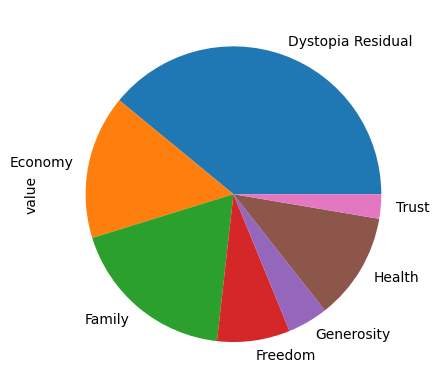

In [60]:
import numpy as np
melt.pivot_table(index="variable", values="value", aggfunc=np.mean).plot(kind="pie", y="value", legend=False)
plt.show()


<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Dataframe</td>
<td>No, applies functions along an axis</td>
</tr>
</tbody></table>

## Vaja

In [72]:
import pandas as pd
import json

json_data_path = "./data/honeypot.json"

In [83]:
honeypot_data = pd.read_json(json_data_path, lines=True)
honeypot_data = honeypot_data.loc[:, ["session", "url", "src_ip", "country_name"]]

In [84]:
honeypot_data

,session,url,src_ip,country_name
0,ed4aa370e653c758,http://212.101.137.37:9000/favicon.ico,185.220.101.129,Germany
1,eda625fe98d2afd4,http://212.101.137.36:8088/,92.118.161.9,Republic of Lithuania
2,62739085ffd318cb,http://212.101.137.37:80/,185.173.35.33,Germany
3,cea36ece5286e2a4,http://212.101.137.36:88/,162.142.125.53,United States
4,cb50aaf1cee7557c,http://212.101.137.36:8020/,185.173.35.33,Germany
...,...,...,...,...
144,ebc0e6491a76a706,http://212.101.137.37:8050/flu/403.html,209.97.140.102,United Kingdom
145,655a334843b88172,http://212.101.137.37:8058/flu/403.html,209.97.140.102,United Kingdom
146,79d00410bab3ba99,http://212.101.137.37:8061/flu/403.html,209.97.140.102,United Kingdom
147,f5292b37395177d4,http://212.101.137.37:8100/flu/403.html,209.97.140.102,United Kingdom


In [88]:
# Veljati morajo vsi pogoji

# URL: ip je 212.101.137.37
honeypot_data["ip_37"] = honeypot_data["url"].str.contains("212.101.137.37")

# src ip se začne 209.97.*
honeypot_data["209.97"] = honeypot_data["src_ip"].str.contains("209.97")

# država united Kingdom
honeypot_data["UK"] = honeypot_data["country_name"].str.contains("United Kingdom")



0      False
1      False
2      False
3      False
4      False
       ...  
144     True
145     True
146     True
147     True
148    False
Length: 149, dtype: bool

In [95]:
# filtered_data = honeypot_data.loc[(honeypot_data["ip_37"] == True) & (honeypot_data["209.97"] == True) & (honeypot_data["UK"] == True), :].copy
filtered_data = honeypot_data[honeypot_data[["ip_37","209.97", "UK"]].all(axis="columns")].copy()


> poglej si metodo pd.all() !!!

In [97]:
filtered_data.head()

,session,url,src_ip,country_name,ip_37,209.97,UK
61,991706380bfd89c4,http://212.101.137.37:9010/system_api.php,209.97.140.102,United Kingdom,True,True,True
62,e6ca6764554e30be,http://212.101.137.37:9016/system_api.php,209.97.140.102,United Kingdom,True,True,True
63,743668e6481a3b3d,http://212.101.137.37:9020/system_api.php,209.97.140.102,United Kingdom,True,True,True
64,b6b688ad1e087f50,http://212.101.137.37:9030/system_api.php,209.97.140.102,United Kingdom,True,True,True
65,36a96fe32c04d782,http://212.101.137.37:8008/system_api.php,209.97.140.102,United Kingdom,True,True,True


In [ ]:
# Iz stolpca url izpise API path (kar je zapisano za portom)

In [99]:
import re

url_path_regex = re.compile(r"https?:\/\/.+?(\/.*)")

def extract_url_path(full_url: str) -> str:
        if full_url.startswith("/"):
            return full_url
        try:
            return url_path_regex.search(full_url).group(1)
        except AttributeError:
            return "/"

In [101]:
filtered_data["url"].apply(extract_url_path).value_counts()

/c/version.js                   18
/stream/live.php                18
/flu/403.html                   15
/streaming/clients_live.php     14
/system_api.php                 11
/stalker_portal/c/version.js    11
Name: url, dtype: int64

In [102]:
# druga možnost -> omogoča kompleksnejso uporabo funkcije
filtered_data.apply(lambda row: extract_url_path(row["url"]), axis=1)

# kako prikažemo še ostale stolpce

61     /system_api.php
62     /system_api.php
63     /system_api.php
64     /system_api.php
65     /system_api.php
            ...       
143      /flu/403.html
144      /flu/403.html
145      /flu/403.html
146      /flu/403.html
147      /flu/403.html
Length: 87, dtype: object